Trabalho de Data Science - Entrega 2

Instruções
Caros alunos,
Espero que estejam todos bem. Agora que já selecionaram e exploraram inicialmente o dataset escolhido, vamos avançar para a próxima etapa desta atividade, focada em analisar os dados em profundidade e preparar uma apresentação dos resultados obtidos.

1. Processamento dos dados:
   - Análise Exploratória: Realizem uma análise exploratória inicial para entenderem as características básicas do dataset, como quantidade de registros, variáveis disponíveis e possíveis lacunas nos dados.
   - Preprocessamento: Apliquem técnicas de limpeza de dados para corrigir ou remover registros incorretos ou incompletos e transformar variáveis conforme necessário para a análise.
   - Análise Estatística Detalhada: Utilizem técnicas de análise de dados para extrair insights significativos. Identifiquem padrões, tendências e anomalias. Se necessário, utilizem gráficos e outras ferramentas visuais para facilitar a compreensão dos dados.

2. Preparação da Apresentação:
   - Estruturação: Organizem sua apresentação de 10 minutos, começando com uma introdução ao dataset, seguida pela metodologia de análise e os principais achados.
   - Visualização de Dados: Incluam visualizações claras e informativas que resumam as descobertas chave. Certifiquem-se de que cada gráfico tenha uma legenda explicativa e seja diretamente relevante para os pontos discutidos.

In [ ]:
# Passo a passo
# Passo 1: Importar base de dados
# Passo 2: Visualizar base de dados
# Passo 3: Corrigir erros da base de dados
# Passo 4: Análise das vacinação
# Passo 5: Análise de qual vacina foi mais tomada(como as colunas impactam nos casos?)
# Passo a passo do projeto
# Passo 1: Importar a base de dados
#!pip install pandas numpy openpyxl nbformat ipykernel plotly


In [2]:
# Passo 1: Importar base de dados

import pandas as pd

# Passo 2: Visualizar base de dados
tabela = pd.read_csv("vacinacao-covid.csv")


display(tabela)

,CODIGO,QUANTIDADE,DATA,TP_VACINA,DS_FABRICANTE
0,430003,-100,2021-12-03,AstraZeneca,FUNDACAO OSWALDO CRUZ
1,430003,-100,2021-12-03,CoronaVac,FUNDACAO BUTANTAN
2,430003,-5,2021-10-25,CoronaVac,INSTITUTO BUTANTAN
3,430003,5,2021-10-20,AstraZeneca,FUNDACAO OSWALDO CRUZ
4,430003,6,2022-05-11,Pfizer,PFIZER MANUFACTURING BELGIUM NV - BELGICA
...,...,...,...,...,...
96197,432380,858,2021-10-26,Pfizer,PFIZER MANUFACTURING BELGIUM NV - BELGICA
96198,432380,900,2021-09-27,Pfizer,PFIZER MANUFACTURING BELGIUM NV - BELGICA
96199,432380,920,2021-07-01,AstraZeneca,FUNDACAO OSWALDO CRUZ
96200,432380,1222,2022-01-17,Pfizer,PFIZER MANUFACTURING BELGIUM NV - BELGICA


In [3]:
# Passo 3: Corrigir erros da base de dados

display(tabela.info())

#Corrigindo valores vazios
#Excluindo linhas vazios

tabela = tabela.dropna()

display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96202 entries, 0 to 96201
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CODIGO         96202 non-null  int64 
 1   QUANTIDADE     96202 non-null  int64 
 2   DATA           96202 non-null  object
 3   TP_VACINA      96200 non-null  object
 4   DS_FABRICANTE  96200 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 96200 entries, 0 to 96201
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CODIGO         96200 non-null  int64 
 1   QUANTIDADE     96200 non-null  int64 
 2   DATA           96200 non-null  object
 3   TP_VACINA      96200 non-null  object
 4   DS_FABRICANTE  96200 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.4+ MB


None

In [8]:
# Passo 4: Análise inicial dos tipos de vacinas tomadas

# quantas pessoas tomaram um tipo de vacina 
vacinas = tabela.groupby('TP_VACINA')['QUANTIDADE'].sum()

print(vacinas)




TP_VACINA
AstraZeneca     9275233
CoronaVac       5882650
Janssen         1723515
Pfizer         14967572
Name: QUANTIDADE, dtype: int64


In [9]:
# Passo 4: Análise inicial dos tipos de vacinas tomadas

# Converta a coluna 'DATA' para o tipo datetime
tabela['DATA'] = pd.to_datetime(tabela['DATA'])

# Filtre os dados para o ano que você está interessado, por exemplo, 2023
tabela_2023 = tabela[tabela['DATA'].dt.year == 2023]

# Calcule o total de pessoas vacinadas em 2023
total_vacinados_2023 = tabela_2023['QUANTIDADE'].sum()

# Obtenha as vacinas administradas em 2023
vacinas_2023 = tabela_2023['TP_VACINA'].unique()

print(f"Total de pessoas vacinadas em 2023: {total_vacinados_2023}")
print(f"Vacinas administradas em 2023: {vacinas_2023}")


Total de pessoas vacinadas em 2023: 1680143
Vacinas administradas em 2023: ['CoronaVac' 'Pfizer' 'Janssen' 'AstraZeneca']


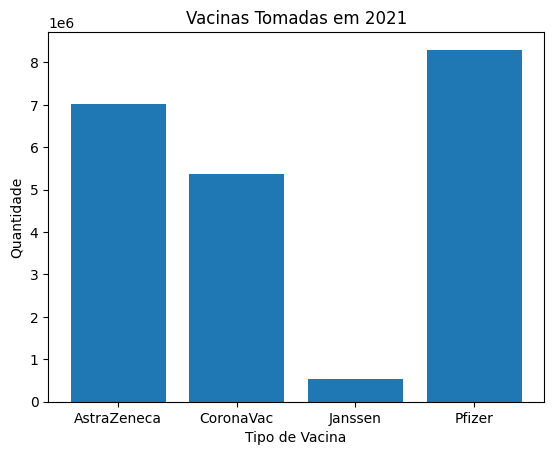

In [4]:
#Analisando o ano que mais teve vacinação e qual vacina foi mais utilizada

import pandas as pd
import matplotlib.pyplot as plt

# Leia os dados do seu arquivo CSV
tabela = pd.read_csv("vacinacao-covid.csv")

# Converta a coluna 'DATA' para o tipo datetime
tabela['DATA'] = pd.to_datetime(tabela['DATA'])

# Crie uma nova coluna 'ANO' com o ano da data
tabela['ANO'] = tabela['DATA'].dt.year

# Agrupe os dados por ano e tipo de vacina e calcule a quantidade total de cada tipo
tabela_agrupada = tabela.groupby(['ANO', 'TP_VACINA'])['QUANTIDADE'].sum().reset_index()

# Encontre o ano com a maior quantidade de vacinas tomadas
ano_max = tabela_agrupada.loc[tabela_agrupada['QUANTIDADE'].idxmax(), 'ANO']

# Filtre os dados para esse ano
tabela_ano_max = tabela_agrupada[tabela_agrupada['ANO'] == ano_max]

# Crie um gráfico de barras com o tipo de vacina no eixo x e a quantidade no eixo y
plt.bar(tabela_ano_max['TP_VACINA'], tabela_ano_max['QUANTIDADE'])
plt.xlabel('Tipo de Vacina')
plt.ylabel('Quantidade')
plt.title(f'Vacinas Tomadas em {ano_max}')
plt.show()


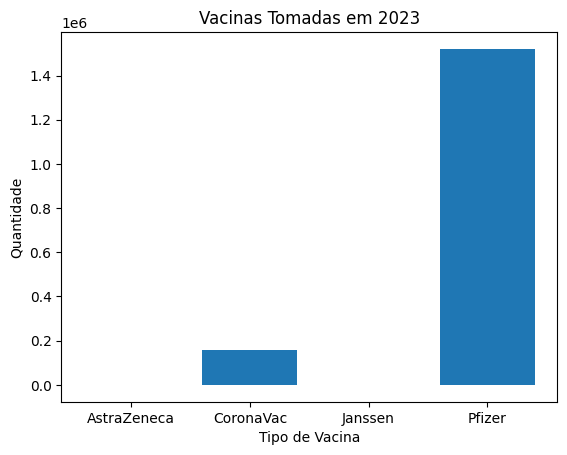

In [5]:
#Mostrando o ano que menos teve vacinação e que vacina foi tomada

import pandas as pd
import matplotlib.pyplot as plt

# Leia os dados do seu arquivo CSV
tabela = pd.read_csv("vacinacao-covid.csv")

# Converta a coluna 'DATA' para o tipo datetime
tabela['DATA'] = pd.to_datetime(tabela['DATA'])

# Crie uma nova coluna 'ANO' com o ano da data
tabela['ANO'] = tabela['DATA'].dt.year

# Agrupe os dados por ano e tipo de vacina e calcule a quantidade total de cada tipo
tabela_agrupada = tabela.groupby(['ANO', 'TP_VACINA'])['QUANTIDADE'].sum().reset_index()

# Encontre o ano com a menor quantidade de vacinas tomadas
ano_min = tabela_agrupada.loc[tabela_agrupada['QUANTIDADE'].idxmin(), 'ANO']

# Filtre os dados para esse ano
tabela_ano_min = tabela_agrupada[tabela_agrupada['ANO'] == ano_min]

# Crie um gráfico de barras com o tipo de vacina no eixo x e a quantidade no eixo y
plt.bar(tabela_ano_min['TP_VACINA'], tabela_ano_min['QUANTIDADE'])
plt.xlabel('Tipo de Vacina')
plt.ylabel('Quantidade')
plt.title(f'Vacinas Tomadas em {ano_min}')
plt.show()


In [6]:
import pandas as pd

# Leia os dados do seu arquivo CSV
tabela = pd.read_csv("vacinacao-covid.csv")

# Converta a coluna 'DATA' para o tipo datetime
tabela['DATA'] = pd.to_datetime(tabela['DATA'])

# Crie uma nova coluna 'ANO' com o ano da data
tabela['ANO'] = tabela['DATA'].dt.year

# Agrupe os dados por ano e tipo de vacina e calcule a quantidade total de cada tipo
tabela_agrupada = tabela.groupby(['ANO', 'TP_VACINA'])['QUANTIDADE'].sum().reset_index()

# Calcule a quantidade total de vacinas tomadas em cada ano
total_por_ano = tabela_agrupada.groupby('ANO')['QUANTIDADE'].sum()

# Calcule a porcentagem de cada tipo de vacina em cada ano
tabela_agrupada['PORCENTAGEM'] = tabela_agrupada.apply(lambda row: (row['QUANTIDADE'] / total_por_ano[row['ANO']]) * 100, axis=1)

# Agora 'tabela_agrupada' contém a porcentagem de cada tipo de vacina em cada ano
print(tabela_agrupada)


     ANO    TP_VACINA  QUANTIDADE  PORCENTAGEM
0   2021  AstraZeneca     7025858    33.093527
1   2021    CoronaVac     5364410    25.267696
2   2021      Janssen      541345     2.549869
3   2021       Pfizer     8298696    39.088908
4   2022  AstraZeneca     2249450    25.804210
5   2022    CoronaVac      299780     3.438879
6   2022      Janssen     1182420    13.563944
7   2022       Pfizer     4985726    57.192967
8   2023  AstraZeneca         -75    -0.004464
9   2023    CoronaVac      159860     9.514666
10  2023      Janssen        -250    -0.014880
11  2023       Pfizer     1520608    90.504677
12  2024    CoronaVac       58600    26.498811
13  2024       Pfizer      162542    73.501189


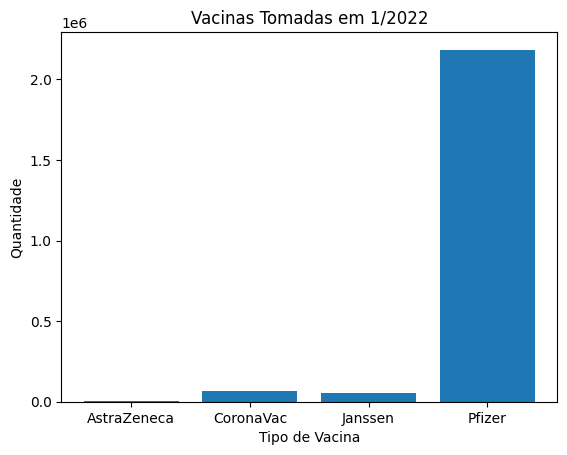

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Leia os dados do seu arquivo CSV
tabela = pd.read_csv("vacinacao-covid.csv")

# Converta a coluna 'DATA' para o tipo datetime
tabela['DATA'] = pd.to_datetime(tabela['DATA'])

# Crie novas colunas 'ANO' e 'MES' com o ano e o mês da data
tabela['ANO'] = tabela['DATA'].dt.year
tabela['MES'] = tabela['DATA'].dt.month

# Agrupe os dados por ano, mês e tipo de vacina e calcule a quantidade total de cada tipo
tabela_agrupada = tabela.groupby(['ANO', 'MES', 'TP_VACINA'])['QUANTIDADE'].sum().reset_index()

# Encontre o ano e o mês com a maior quantidade de vacinas tomadas
ano_max, mes_max = tabela_agrupada.loc[tabela_agrupada['QUANTIDADE'].idxmax(), ['ANO', 'MES']]

# Filtre os dados para esse ano e mês
tabela_ano_mes_max = tabela_agrupada[(tabela_agrupada['ANO'] == ano_max) & (tabela_agrupada['MES'] == mes_max)]

# Crie um gráfico de barras com o tipo de vacina no eixo x e a quantidade no eixo y
plt.bar(tabela_ano_mes_max['TP_VACINA'], tabela_ano_mes_max['QUANTIDADE'])
plt.xlabel('Tipo de Vacina')
plt.ylabel('Quantidade')
plt.title(f'Vacinas Tomadas em {mes_max}/{ano_max}')
plt.show()


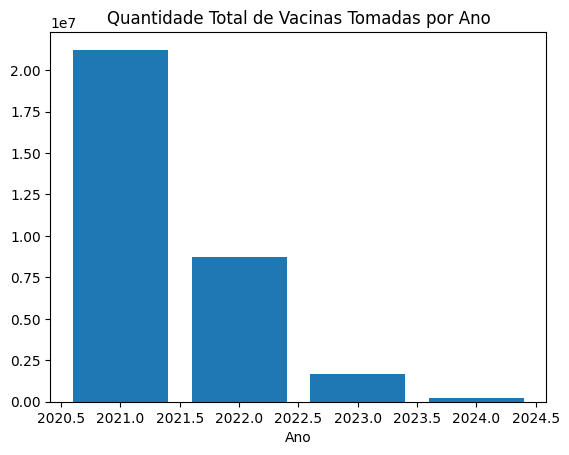

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Leia os dados do seu arquivo CSV
tabela = pd.read_csv("vacinacao-covid.csv")

# Converta a coluna 'DATA' para o tipo datetime
tabela['DATA'] = pd.to_datetime(tabela['DATA'])

# Crie uma nova coluna 'ANO' com o ano da data
tabela['ANO'] = tabela['DATA'].dt.year

# Agrupe os dados por ano e calcule a quantidade total de vacinas tomadas em cada ano
tabela_agrupada = tabela.groupby('ANO')['QUANTIDADE'].sum()

# Crie um gráfico de barras com o ano no eixo x e a quantidade no eixo y
plt.bar(tabela_agrupada.index, tabela_agrupada.values)
plt.xlabel('Ano')



plt.title('Quantidade Total de Vacinas Tomadas por Ano')
plt.show()
